In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [2]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [24]:
df = pd.read_csv("breast-cancer-dataset.csv")
df

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [25]:
df.isna().sum()

S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df["Diagnosis Result"].value_counts()

Diagnosis Result
Benign       120
Malignant     93
Name: count, dtype: int64

In [28]:
df["Breast Quadrant"].value_counts()

Breast Quadrant
Upper outer     67
Lower outer     54
Upper inner     45
Lower inner     44
#                2
Upper outer      1
Name: count, dtype: int64

In [29]:
df["Breast"].value_counts()

Breast
Left     107
Right    100
#          6
Name: count, dtype: int64

In [30]:
df.drop("S/N", inplace=True, axis=1)

In [31]:
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [38]:
for col in df.columns:
  df = df[df[col]!= "#"]
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,0,0,Upper inner,0,0
1,2019,39,1,2,0,0,0,Upper outer,0,0
2,2019,45,0,4,0,0,0,Lower outer,0,0
3,2019,26,1,3,0,0,0,Lower inner,1,0
4,2019,21,1,1,0,0,0,Upper outer,1,0
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,0,1,Lower inner,1,0
209,2020,28,1,3,0,0,0,Upper inner,0,0
210,2020,22,1,1,0,0,0,Upper outer,1,0
211,2020,19,1,1,0,0,0,Lower inner,1,0


In [52]:
df["Breast"] = df["Breast"].apply(lambda x: 1 if x in ["Right", "Left"] else 0)
df["Diagnosis Result"] = df["Diagnosis Result"].apply(lambda x: 1 if x == "Malignant" else 0)
df["Tumor Size (cm)"] = df["Tumor Size (cm)"].apply(lambda x: int(x) if x else 0)
df["History"] = df["History"].apply(lambda x: int(x) if x else 0)
df["Inv-Nodes"] = df["Inv-Nodes"].apply(lambda x: int(x) if x else 0)
df["Metastasis"] = df["Metastasis"].apply(lambda x: int(x) if x else 0)
df["Year"] = df["Year"].apply(lambda x: int(x) if x else 0)


In [49]:
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,0,0,Upper inner,0,0
1,2019,39,1,2,0,0,0,Upper outer,0,0
2,2019,45,0,4,0,0,0,Lower outer,0,0
3,2019,26,1,3,0,0,0,Lower inner,1,0
4,2019,21,1,1,0,0,0,Upper outer,1,0
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,0,1,Lower inner,1,0
209,2020,28,1,3,0,0,0,Upper inner,0,0
210,2020,22,1,1,0,0,0,Upper outer,1,0
211,2020,19,1,1,0,0,0,Lower inner,1,0


In [50]:
df.dtypes

Year                object
Age                  int64
Menopause            int64
Tumor Size (cm)      int64
Inv-Nodes            int64
Breast               int64
Metastasis           int64
Breast Quadrant     object
History              int64
Diagnosis Result     int64
dtype: object

In [14]:
df["Tumor Size (cm)"].value_counts()

Tumor Size (cm)
3     34
2     32
4     32
1     29
5     27
6     17
7     14
8     11
10     7
9      7
#      1
14     1
12     1
Name: count, dtype: int64

In [15]:
df["History"].value_counts()

History
0    124
1     87
#      2
Name: count, dtype: int64

In [46]:
df[df["History"] == "#"]

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result


In [51]:
df["Menopause"].value_counts()

Menopause
1    140
0     70
Name: count, dtype: int64

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

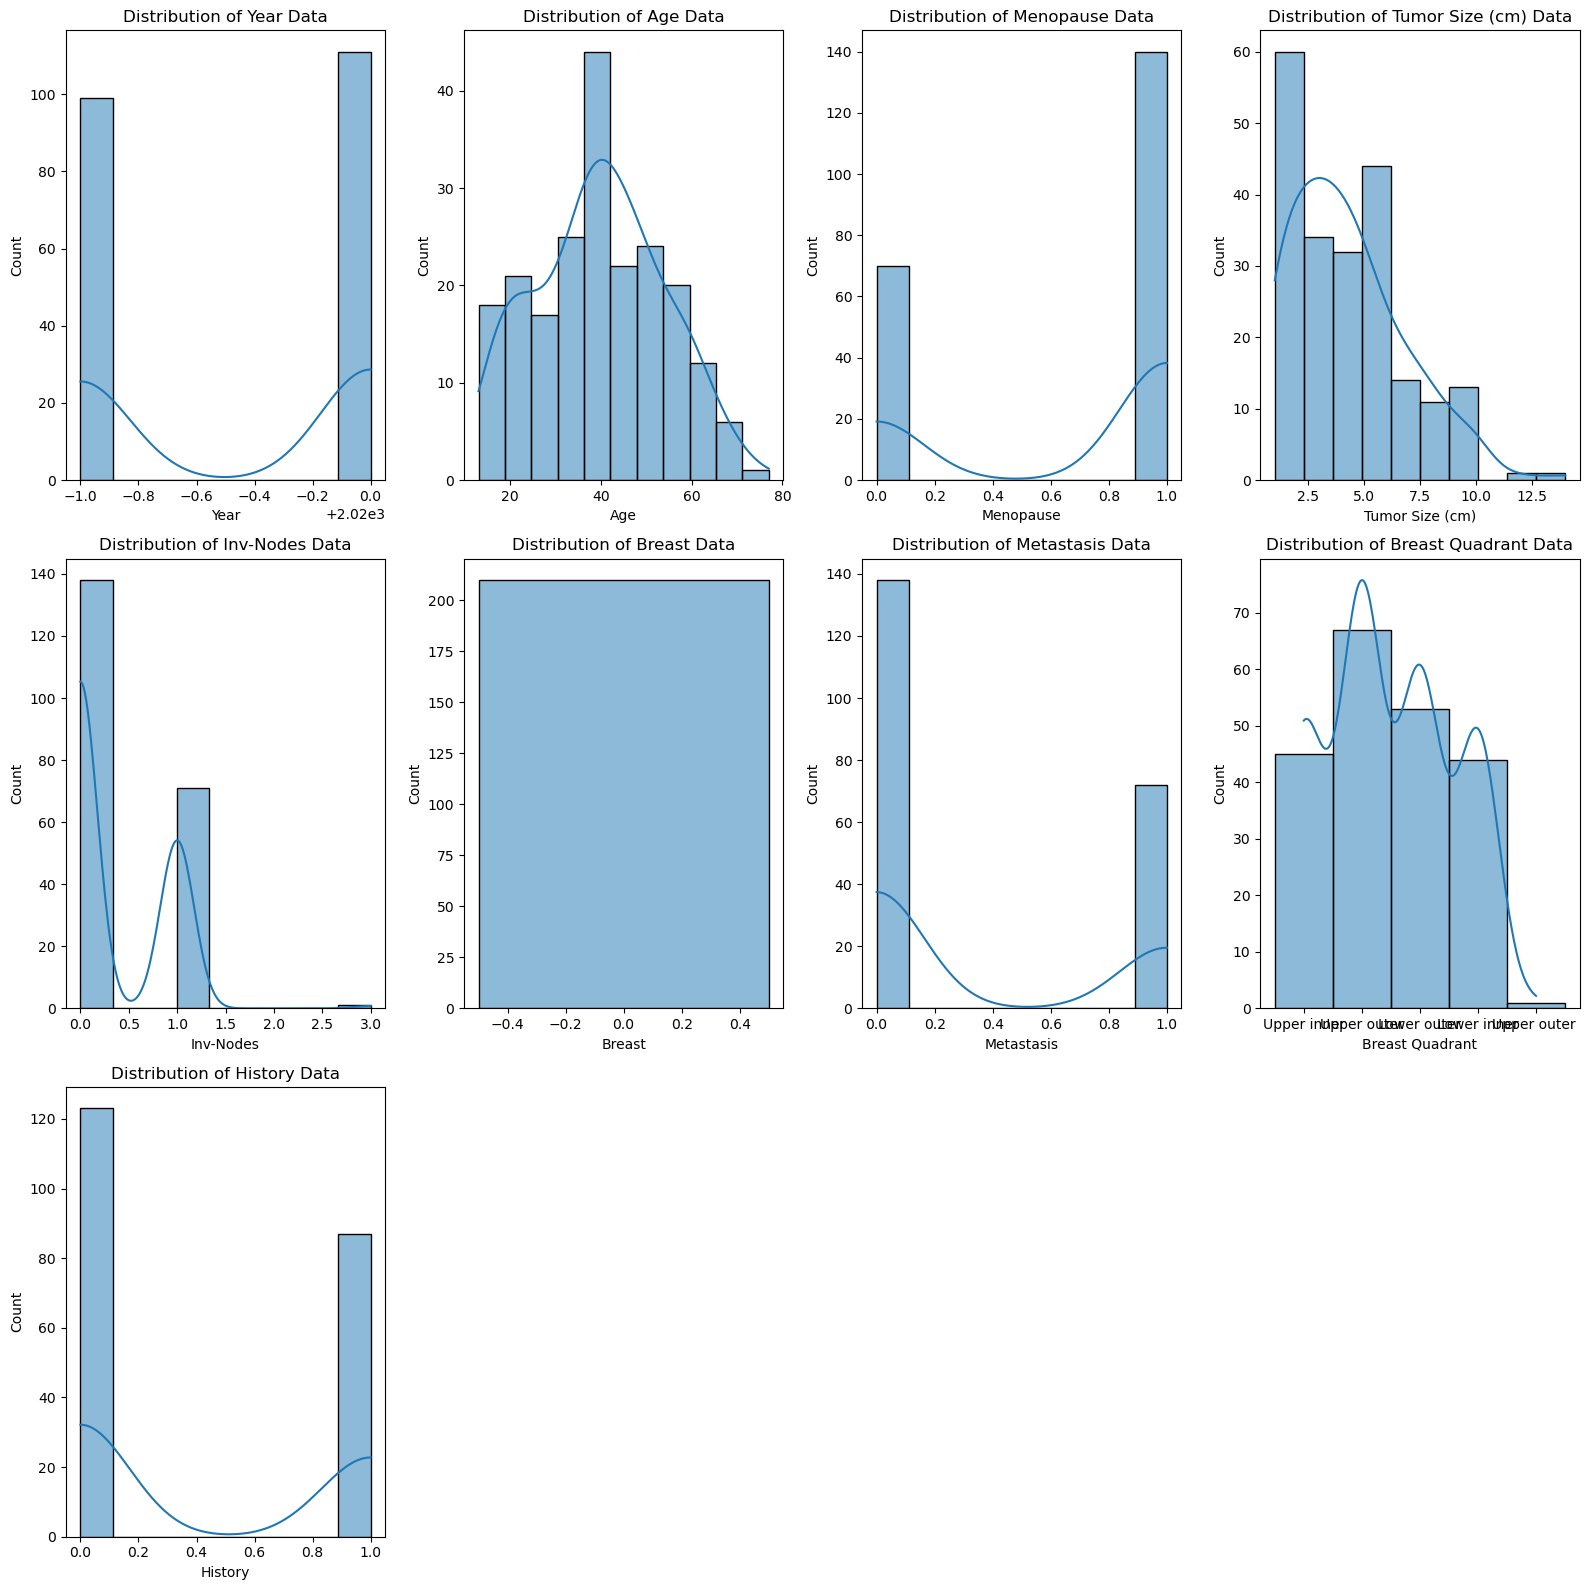

In [53]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

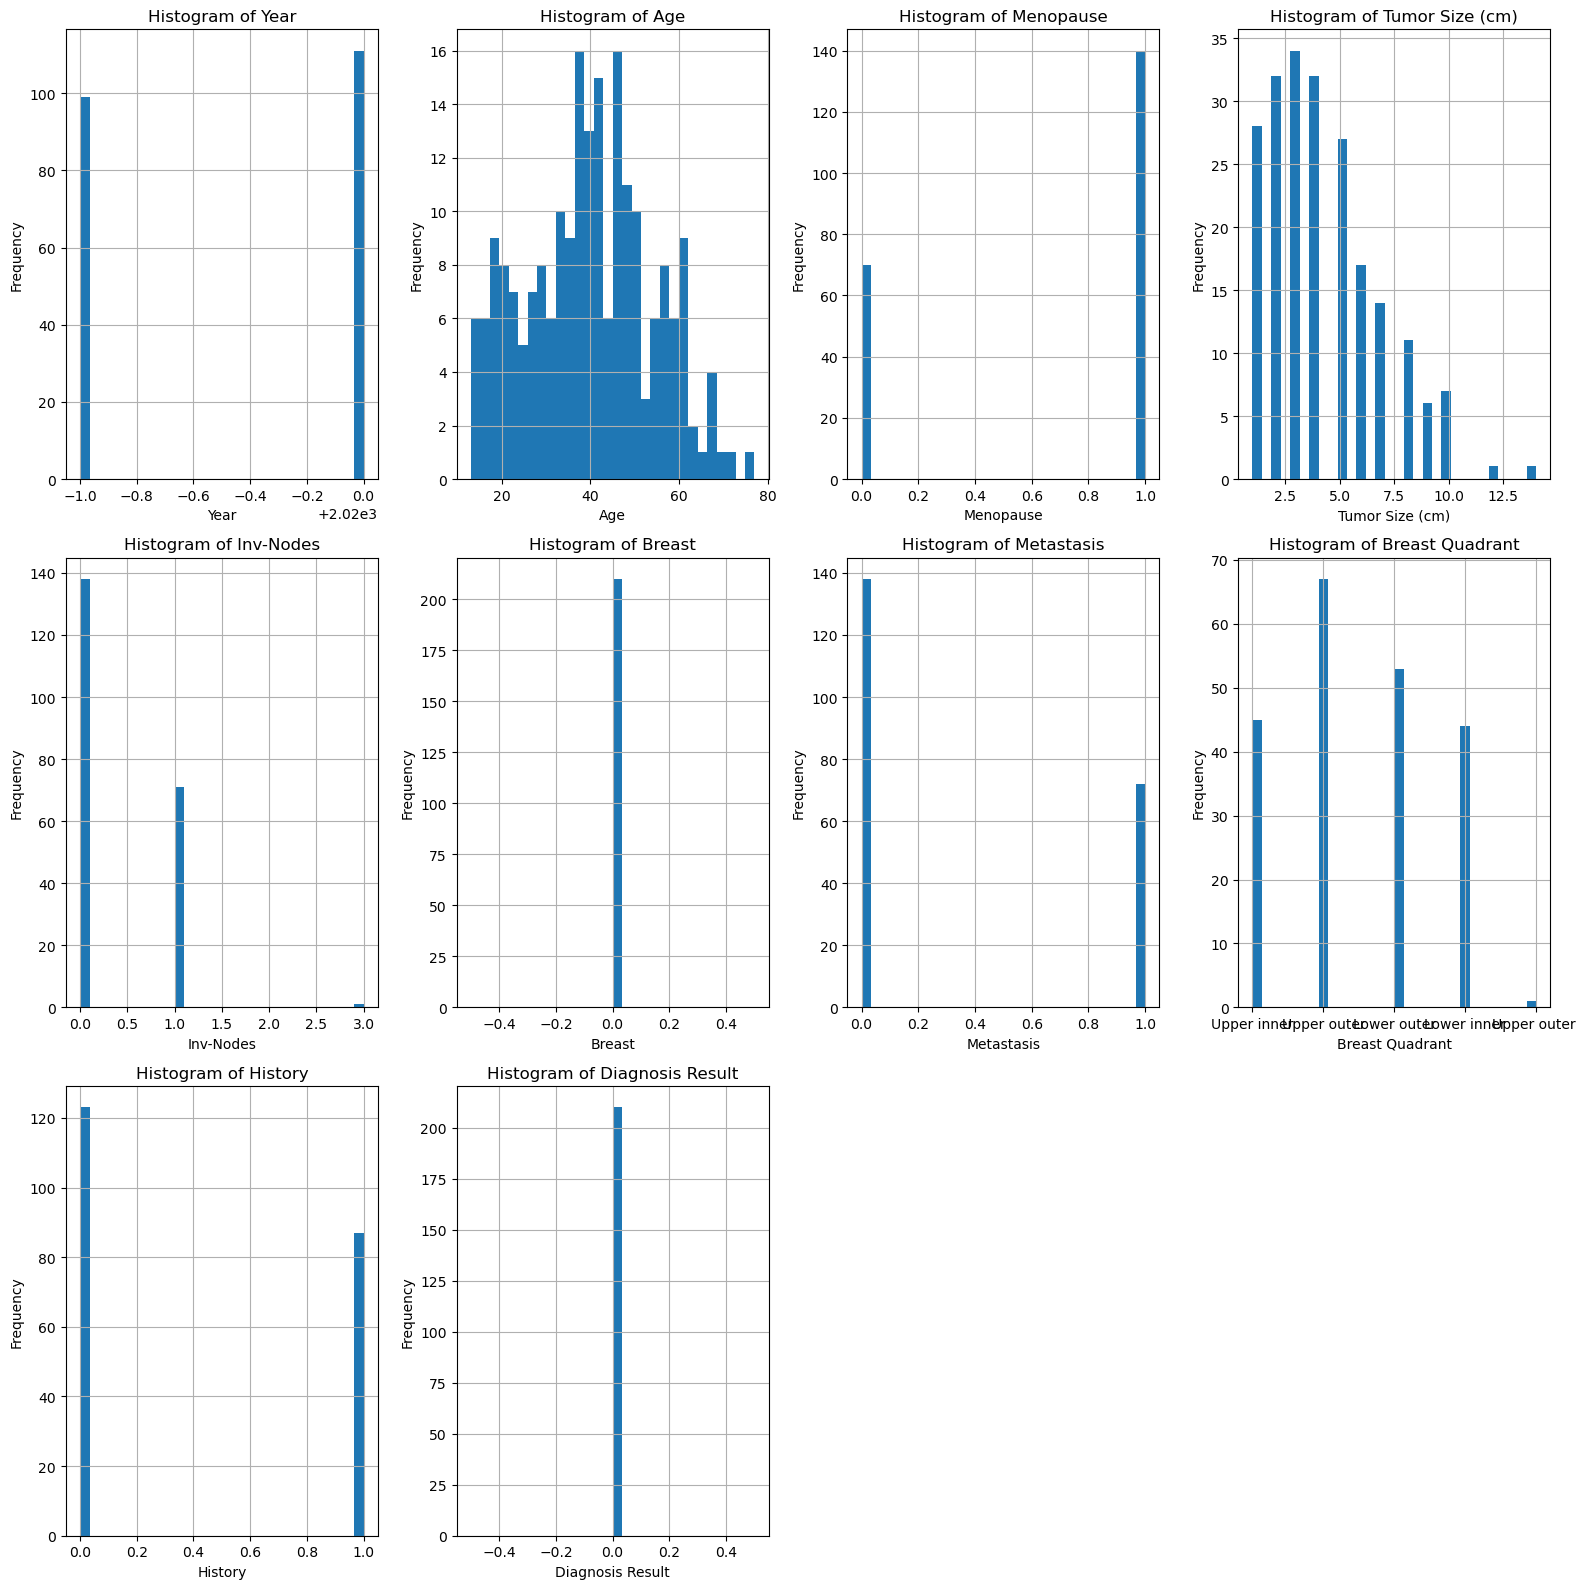

In [54]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()